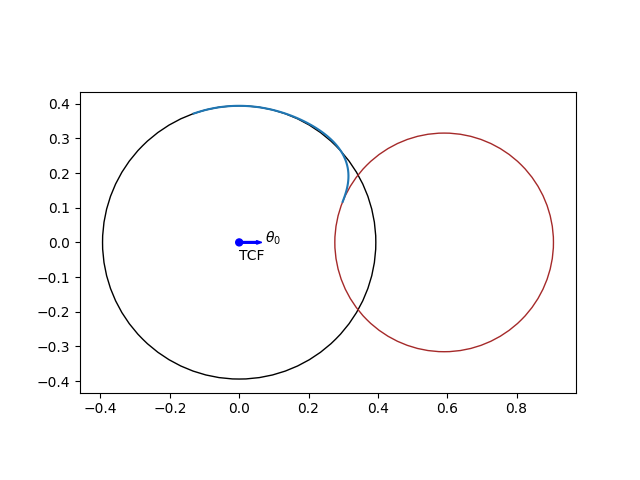

In [80]:
import flexring as flx
import math_utils as ut
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from euclid3 import Vector2
from pathlib import Path
%matplotlib widget
plt.cla()
def draw_cartesian_system(centre:Vector2, x_direction:Vector2, scale = 1, name=""):
    plt.arrow(centre.x, centre.y, x_direction.x*scale, x_direction.y*scale,
                         head_width = 0.5, width = 0.005, color="blue")
    plt.arrow(centre.x, centre.y, -x_direction.y*scale, x_direction.x*scale,
                         head_width = 0.5, width = 0.005, color="red")
    plt.gca().annotate("  x", xy=centre + x_direction * (scale+0.03))
    plt.gca().annotate(" y", xy=centre - x_direction.cross() * (scale+0.03))
    plt.gca().annotate(name, xy = centre + x_direction.cross()*0.2, )
def draw_polar_system(centre, theta_direction, name=""):
     plt.gca().add_patch(patches.Circle(xy= centre, radius=0.01, color="blue"))
     plt.arrow(centre.x, centre.y, 0.05*theta_direction.x, 0.05*theta_direction.y,
                         head_width = 0.01, width = 0.005, color="blue")
     plt.gca().annotate(r"$\theta_0$", xy=centre + 0.05*theta_direction * 1.5)
     plt.gca().annotate(name, xy=centre + 0.05*theta_direction.cross())

repo_root = Path.cwd().parent
mat_file_path = Path.joinpath(repo_root, "data", "beta_5.mat")

tyre_centre = Vector2(0 , 0)
tyre_radius = 0.788/2
penetration = 0.3
terrain_radius = tyre_radius * 0.8
beam = ut.BeamTyre(beta=5, tyre_radius=tyre_radius, boundary_theta_map_file=mat_file_path)
terrain_centre = Vector2(tyre_radius + terrain_radius - tyre_radius*penetration, 0)
tyre = patches.Circle(xy = tyre_centre, radius=tyre_radius, fill=False, color = "black")
draw_polar_system(tyre_centre, Vector2(1 , 0), "TCF")
obstacle = patches.Circle(terrain_centre, terrain_radius,fill = False, color = "brown")
theta, deflection = beam(penetration=penetration*tyre_radius, terrain_radius=terrain_radius)
plt.gca().add_patch(tyre)
plt.gca().add_patch(obstacle)
plt.gca().set_aspect("equal")
positions = np.array([tyre_centre + (tyre_radius - epsilon)*Vector2(np.cos(t) , np.sin(t)) for\
             epsilon, t in zip(deflection , theta)])
plt.plot(positions[:, 0] , positions[: , 1])
plt.show()